In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

plt.style.use("seaborn")

In [2]:
X = pd.read_csv("./train_X_re.csv")
Y = pd.read_csv("./train_Y_re.csv", header=None)

In [3]:
X.columns

Index(['avg_time_week', 'project_rate', 'practice_sets_score', 'activity',
       'streak', 'quiz_score', 'regularity'],
      dtype='object')

/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quiz_score', ylabel='practice_sets_score'>

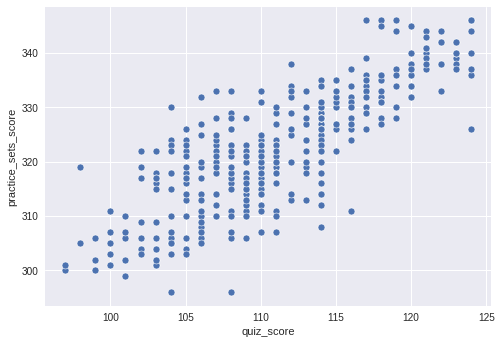

In [4]:
sns.scatterplot(X["quiz_score"],X["practice_sets_score"])

In [5]:
X = pd.read_csv("./train_X_re.csv").values
Y = pd.read_csv("./train_Y_re.csv", header=None).values

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.1,
                                                random_state=83)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=14, weights="distance", algorithm="brute", p=1)
knn.fit(trainX, trainY)

KNeighborsRegressor(algorithm='brute', n_neighbors=14, p=1, weights='distance')

In [7]:
pred_Y = knn.predict(testX)

In [8]:
def check_mse(actual_Y, pred_Y):
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(actual_Y, pred_Y)
    print("MSE", mse)

    return mse

check_mse(testY, pred_Y)

MSE 29.105915989726356


29.105915989726356

In [9]:
knn.get_params()


{'algorithm': 'brute',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 14,
 'p': 1,
 'weights': 'distance'}

In [10]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Dec 16 18:02:16 2020

@author: sridhar
"""

import numpy as np
import pandas as pd
import math
import csv
import pickle

from collections import Counter
from sklearn.model_selection import train_test_split


def compute_ln_norm_distance(vector1, vector2, n):
    res = 0
    for i in range(len(vector1)):
        res += abs((vector1[i]-vector2[i]))**n

    return res**(1/n)


def find_k_nearest_neighbors(train_X, trainY, test_example, k, n):
    arr = []
    count = 0
    for i in train_X:
        dist = compute_ln_norm_distance(i, test_example, n)
        arr.append((dist, trainY[count], i))
        count += 1

    arr.sort(key=lambda x: -x[0])
    X = []
    Y = []
    for i in range(k):
        Y.append(arr[i][1])
        X.append(arr[i][2])

    return np.array(X), np.array(Y)


def get_WeightMatrix_for_LOWES(query_point, Training_examples, Bandwidth):
    # M is the No of training examples
    M = Training_examples.shape[0]
    # Initialising W with identity matrix
    W = np.mat(np.eye(M))
    # calculating weights for query points
    for i in range(M):
        xi = Training_examples[i]
        denominator = (-2 * Bandwidth * Bandwidth)
        W[i, i] = np.exp(np.dot((xi-query_point), (xi-query_point).T)/denominator)
        return W


def predict(Training_examples, Y, query_x, Bandwidth):
    M = Training_examples.shape[0]
    all_ones = np.ones((M, 1))
    X_ = np.hstack((Training_examples, all_ones))
    qx = np.mat(np.append(query_x, 1))
    
    W = get_WeightMatrix_for_LOWES(qx, X_, Bandwidth)
    # calculating parameter theta
    theta = np.linalg.pinv(X_.T*(W * X_))*(X_.T*(W * Y))
    # calculating predictions
    pred = np.dot(qx, theta)
    return theta, pred


def check_mse(actual_Y, pred_Y):
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(actual_Y, pred_Y)
    print("MSE", mse)

    return mse


X = pd.read_csv("./train_X_re.csv").values
Y = pd.read_csv("./train_Y_re.csv", header=None).values

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.1,
                                                random_state=83)

In [11]:
Bandwidth = 10
Y_test = []

for query in testX:
    x,y = find_k_nearest_neighbors(trainX, trainY, query, 83, 1)
    theta, pred = predict(x, y, query, Bandwidth)
    Y_test.append(pred[0][0])

In [12]:
pred = np.array(Y_test).reshape(len(Y_test),1)

In [13]:
check_mse(testY,pred)

MSE 24.833534697887966


24.833534697887966

In [14]:
len(Y)

375

In [15]:
final = 0
best_mse = 998989
for bandwidth in range(1,100):
    Y_test = []

    for query in testX:
        x,y = find_k_nearest_neighbors(trainX, trainY, query, 83, 1)
        theta, pred = predict(x, y, query, bandwidth)
        Y_test.append(pred[0][0])
        
    pred = np.array(Y_test).reshape(len(Y_test),1)
    mse = check_mse(testY,pred)
    
    if mse<best_mse:
        final = bandwidth
        best_mse = mse

MSE 24.831172260365058
MSE 24.831172260365058
MSE 24.831172260335364
MSE 24.83117226045848
MSE 24.83117247723236
MSE 24.831182359600596
MSE 24.83127361244833
MSE 24.831617847593908
MSE 24.832373017221983
MSE 24.833534697887966
MSE 24.83492670261255
MSE 24.836321072775256
MSE 24.837571815542148
MSE 24.838677626650927
MSE 24.83976577649638
MSE 24.841033941928696
MSE 24.842688478858545
MSE 24.844900326768794
MSE 24.847783232572628
MSE 24.85138996864842
MSE 24.85571964030511
MSE 24.86073000409841
MSE 24.86635067081751
MSE 24.872494897389203
MSE 24.879069016983358
MSE 24.88597935703663
MSE 24.89313691521441
MSE 24.900460219584442
MSE 24.90787682246483
MSE 24.91532381910496
MSE 24.922747716133554
MSE 24.930103890106547
MSE 24.937355818812936
MSE 24.94447420478458
MSE 24.951436076815064
MSE 24.95822392042958
MSE 24.964824867918185
MSE 24.971229963932757
MSE 24.977433515188434
MSE 24.983432517511602
MSE 24.98922616301596
MSE 24.994815418009807
MSE 25.000202663073868
MSE 25.00539139161811
MSE 2

In [16]:
final

3

In [17]:
import numpy as np
import csv
import sys
import pickle

from validate import validate
from k_NN_algorithm import *

"""
Predicts the target values for data in the file at 'test_X_file_path', using the model learned during training.
Writes the predicted values to the file named "predicted_test_Y_re.csv". It should be created in the same directory where this code file is present.
This code is provided to help you get started and is NOT a complete implementation. Modify it based on the requirements of the project.
"""

def import_data(test_X_file_path):
    test_X = np.genfromtxt(test_X_file_path, delimiter=',', dtype=np.float64, skip_header=1)
    return test_X


def write_to_csv_file(pred_Y, predicted_Y_file_name):
    pred_Y = pred_Y.reshape(len(pred_Y), 1)
    with open(predicted_Y_file_name, 'w', newline='') as csv_file:
        wr = csv.writer(csv_file)
        wr.writerows(pred_Y)
        csv_file.close()

def predict(test_X_file_path):

    # Load Test Data
    test_X = import_data(test_X_file_path)
    test_X = pd.DataFrame(test_X, columns=None).values
    # Load Model Parameters
    """
    You can load the model/parameters from a csv file or a pickle file which is present in the regression.zip
    For example to load from pickle file:
    model = pickle.load(open('./model_file.sav', 'rb'))
    """
    X = pd.read_csv("./train_X_re.csv").values
    Y = pd.read_csv("./train_Y_re.csv", header=None).values
    
    Bandwidth = 14
    pred_Y = []

    # Predict Target Variables
    """
    You can make use of any other helper functions which might be needed.
    Make sure all such functions are submitted in regression.zip and imported properly.
    """
    for query in test_X:
        x,y = find_k_nearest_neighbors(X, Y, query, 83, 1)
        theta, pred = predict_Y(x, y, query, Bandwidth)
        pred_Y.append(pred[0][0])

    pred_Y = np.array(pred_Y).reshape(len(pred_Y),1)

    write_to_csv_file(pred_Y, "predicted_test_Y_re.csv")


if __name__ == "__main__":
    #test_X_file_path = sys.argv[1]
    test_X_file_path = "./train_X_re.csv"
    predict(test_X_file_path)
    # Uncomment to test on the training data
    validate(test_X_file_path, actual_test_Y_file_path="train_Y_re.csv") 

MSE 26.986211481568713


In [65]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [66]:
dt = DecisionTreeRegressor(max_depth=8, min_samples_split=20)

In [67]:
X = pd.read_csv("./train_X_re.csv").values
Y = pd.read_csv("./train_Y_re.csv", header=None).values

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.1,
                                                random_state=69)

In [68]:
dt = dt.fit(trainX,trainY)

In [69]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [70]:
pred = dt.predict(testX)

In [71]:
check_mse(testY,pred)

MSE 42.05710400810958


42.05710400810958

In [72]:
import pydotplus
import collections

In [73]:
data_feature_names = pd.DataFrame(X).columns

dot_data = export_graphviz(dt,
                           feature_names=data_feature_names,
                           out_file=None,
                           filled=True,
                           rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

True

In [26]:
import turicreate as tc
sfx = tc.SFrame("./train_X_re.csv")
sfy = tc.SFrame.read_csv("./train_Y_re.csv", header=None)

Finished parsing file /mnt/e/Spyder - Copy/ML Project/regression/train_X_re.csv

Parsing completed. Parsed 100 lines in 0.02009 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[float,float,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/e/Spyder - Copy/ML Project/regression/train_X_re.csv

Parsing completed. Parsed 375 lines in 0.009907 secs.

Finished parsing file /mnt/e/Spyder - Copy/ML Project/regression/train_Y_re.csv

Parsing completed. Parsed 100 lines in 0.012533 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/e/Spyder - Copy/ML Project/regression/train_Y_re.csv

Parsing completed. Parsed 375 lines in 0.009545 secs.

In [27]:
sfx.plot()

Materializing SFrame

In [28]:
sfy.plot()

Materializing SFrame

In [30]:
pd.DataFrame(Y).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       375 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


In [31]:
X = pd.read_csv("./train_X_re.csv")
Y = pd.read_csv("./train_Y_re.csv", header=None)

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.1,
                                                random_state=42)

In [32]:
import numpy as np
import pandas as pd
import math


def rss(y_left, y_right):
    def squared_residual_sum(y):
        return np.sum((y - np.mean(y)) ** 2)
    
    return (squared_residual_sum(y_left) + squared_residual_sum(y_right))

def find_best_rule(trainX, trainY):
    best_feature, best_threshold, best_rss = 0, 0, 10**10
    
    for feature in trainX.columns:
        thresholds = trainX[feature].unique().tolist()
        thresholds.sort()
        thresholds = thresholds[1:]
        
        for t in thresholds:
            y_left_ix = trainX[feature] < t
            y_left, y_right = trainY[y_left_ix], trainY[~y_left_ix]
            t_rss = rss(y_left, y_right)
            t_rss = t_rss.values[0]

            if t_rss < best_rss:
                best_rss = t_rss
                best_threshold = t
                best_feature = feature
                
    return {'feature':best_feature, 'threshold':best_threshold}


def split(trainX, trainY, depth, max_depth=None):
    if depth == max_depth or len(trainX) < 2:
        return {'prediction': np.mean(trainY).values[0]}

    rule = find_best_rule(trainX, trainY)
    left_ix = trainX[rule['feature']] < rule['threshold']
    rule['left'] = split(trainX[left_ix], trainY[left_ix], depth+1, max_depth)
    rule['right'] = split(trainX[~left_ix], trainY[~left_ix], depth+1, max_depth)
    
    return rule

def predict_Y(sample, rules):
    prediction = 0
    while not prediction:
        feature, threshold = rules['feature'], rules['threshold']
        if sample[feature].values[0] < threshold:
            rules = rules['left']
            
        else:
            rules = rules['right']
            
        prediction = rules.get('prediction', 0)
        
    return prediction

In [33]:
rules = split(trainX, trainY, 0)

In [34]:
arr = []
for i in range(len(testX)):
    check = testX[i:i+1]
    pred = predict_Y(check, rules)
    arr.append(pred)
    
check_mse(testY, np.array(arr))

MSE 54.79515789473684


54.79515789473684